In [77]:
import pandas as pd

nyc_subway_weather_filename = 'resources/lesson3/nyc_subway_weather.csv'
nyc_subway_weather = pd.read_csv(nyc_subway_weather_filename)

print "nyc_subway_weather: {}".format(len(nyc_subway_weather))

nyc_subway_weather: 42649


In [78]:
print nyc_subway_weather.columns.values
nyc_subway_weather.head()

['UNIT' 'DATEn' 'TIMEn' 'ENTRIESn' 'EXITSn' 'ENTRIESn_hourly'
 'EXITSn_hourly' 'datetime' 'hour' 'day_week' 'weekday' 'station'
 'latitude' 'longitude' 'conds' 'fog' 'precipi' 'pressurei' 'rain' 'tempi'
 'wspdi' 'meanprecipi' 'meanpressurei' 'meantempi' 'meanwspdi'
 'weather_lat' 'weather_lon']


,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [79]:
def normalize(df):
    df_norm = (df - df.mean()) / df.std(ddof=0)
    return df_norm

In [80]:
def pearsonsr(df1, df2):
    df1_norm = normalize(df1)
    df2_norm = normalize(df2)
    return (df1_norm * df2_norm).mean()

In [81]:
print "Pearson's r for {} and {} is: {} (compare to {})".format("entries",
                                                                "exits",
                                                                pearsonsr(nyc_subway_weather['ENTRIESn'],nyc_subway_weather['EXITSn']),
                                                                nyc_subway_weather['ENTRIESn'].corr(nyc_subway_weather['EXITSn'])
                                                               )
print "Pearson's r for {} and {} is: {} (compare to {})".format("entries",
                                                                "rain",
                                                                pearsonsr(nyc_subway_weather['ENTRIESn'],nyc_subway_weather['rain']),
                                                                nyc_subway_weather['ENTRIESn'].corr(nyc_subway_weather['rain'])
                                                               )
print "Pearson's r for {} and {} is: {} (compare to {})".format("entries",
                                                                "temperature",
                                                                pearsonsr(nyc_subway_weather['ENTRIESn'],nyc_subway_weather['tempi']),
                                                                nyc_subway_weather['ENTRIESn'].corr(nyc_subway_weather['tempi'])
                                                               )
print "Pearson's r for {} and {} is: {} (compare to {})".format("rain",
                                                                "temperature",
                                                                pearsonsr(nyc_subway_weather['rain'],nyc_subway_weather['tempi']),
                                                                nyc_subway_weather['rain'].corr(nyc_subway_weather['tempi'])
                                                               )

Pearson's r for entries and exits is: 0.924739397759 (compare to 0.924739397759)
Pearson's r for entries and rain is: -0.00204363373876 (compare to -0.00204363373876)
Pearson's r for entries and temperature is: 0.0134712970318 (compare to 0.0134712970318)
Pearson's r for rain and temperature is: -0.263787648096 (compare to -0.263787648096)


Populating the interactive namespace from numpy and matplotlib


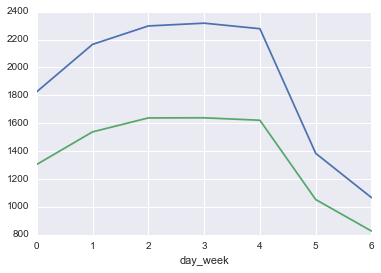

In [82]:
%pylab inline
import seaborn as sns

average_nyc_subway_weather_by_day_week = nyc_subway_weather.groupby('day_week').mean()

average_nyc_subway_weather_by_day_week['ENTRIESn_hourly'].plot()
average_nyc_subway_weather_by_day_week['EXITSn_hourly'].plot()

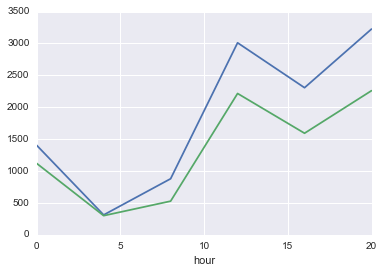

In [83]:
average_nyc_subway_weather_by_hour = nyc_subway_weather.groupby('hour').mean()

average_nyc_subway_weather_by_hour['ENTRIESn_hourly'].plot()
average_nyc_subway_weather_by_hour['EXITSn_hourly'].plot()

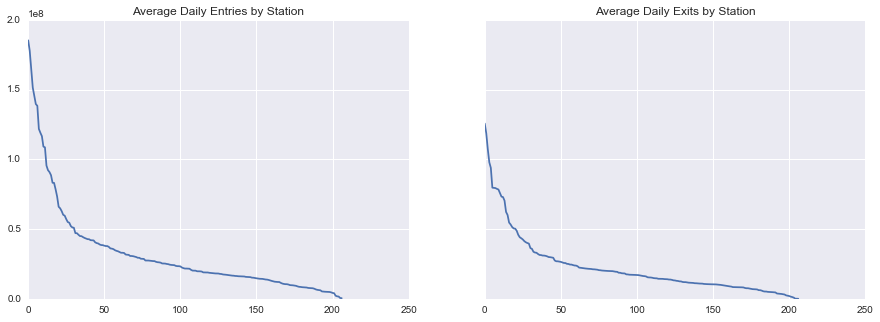

In [86]:
max_daily_entries_by_station_and_day = nyc_subway_weather.groupby(['station', 'DATEn'])['ENTRIESn'].max()
average_daily_entries_by_station = max_daily_entries_by_station_and_day.reset_index().groupby('station').mean()
sorted_average_daily_entries_by_station = average_daily_entries_by_station.sort_values(by='ENTRIESn',ascending=False,inplace=False)

max_daily_exits_by_station_and_day = nyc_subway_weather.groupby(['station', 'DATEn'])['EXITSn'].max()
average_daily_exits_by_station = max_daily_exits_by_station_and_day.reset_index().groupby('station').mean()
sorted_average_daily_exits_by_station = average_daily_exits_by_station.sort_values(by='EXITSn',ascending=False,inplace=False)

fig, (a,b) = plt.subplots(1,2,sharey=True,figsize=(15,5))
a.plot(sorted_average_daily_entries_by_station.values)
a.set_title("Average Daily Entries by Station")

b.plot(sorted_average_daily_exits_by_station.values)
b.set_title("Average Daily Exits by Station")

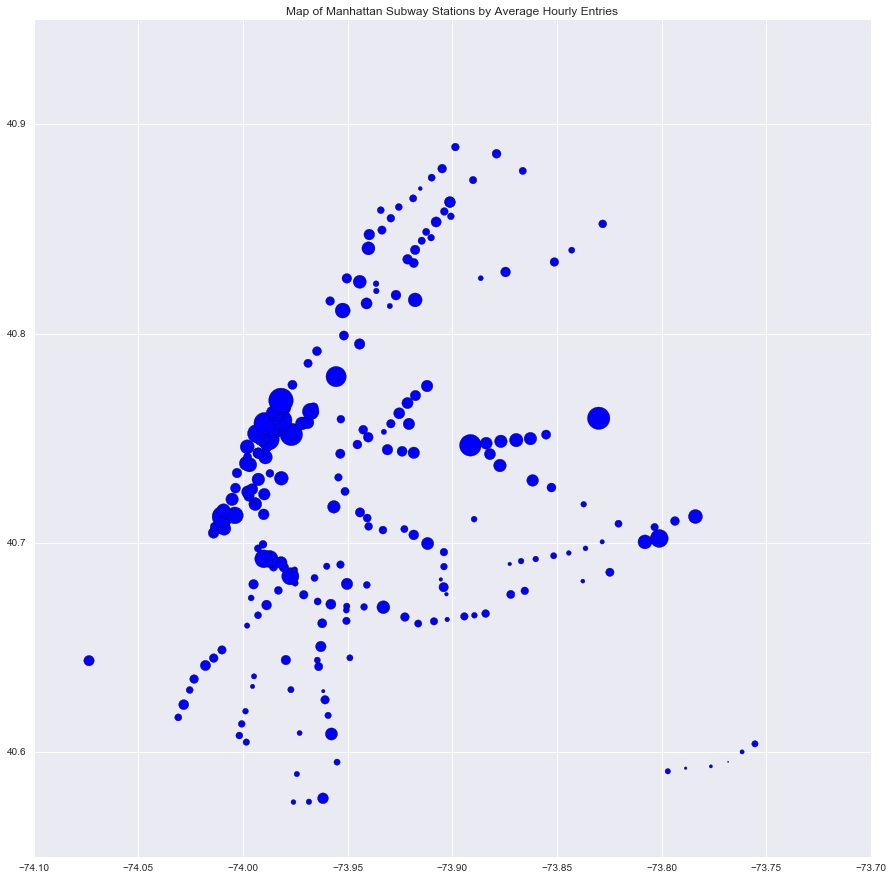

In [111]:
import matplotlib.pyplot as plt
import pylab

mean_hourly_entries_by_location_and_day = nyc_subway_weather.groupby(['latitude', 'longitude', 'DATEn'])['ENTRIESn_hourly'].mean()
# print mean_hourly_entries_by_location_and_day
average_daily_entries_by_location = mean_hourly_entries_by_location_and_day.reset_index().groupby(['latitude', 'longitude']).mean().reset_index()
# print average_daily_entries_by_location

xs = average_daily_entries_by_location['longitude'].values
ys = average_daily_entries_by_location['latitude'].values
ss = 100 * average_daily_entries_by_location['ENTRIESn_hourly'].values / average_daily_entries_by_location['ENTRIESn_hourly'].std()

plt.figure(figsize=(15,15))
plt.scatter(xs,ys,ss)
plt.title('Map of Manhattan Subway Stations by Average Hourly Entries')
plt.gca().set_aspect('equal', adjustable='box')